<a href="https://colab.research.google.com/github/kaitouz/ITMO/blob/main/AI-systems/AISystems_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
number_in_the_list = 10

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# **1. Используйте метод главных компонент для набора данных MNIST (train dataset объема 60000). Определите, какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.8+номер_в_списке%10. Построить график зависимости доли объясненной дисперсии от количества используемых ГК.**

In [4]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

*If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.*

In [5]:
from sklearn.decomposition import PCA

variant_expectation = 0.8 + (number_in_the_list % 10) / 100

pca = PCA(n_components=variant_expectation, svd_solver='full')
modelPCA = pca.fit(X_train)

X_train = modelPCA.transform(X_train)

Explained Variance: 0.8 Number of Components: 44


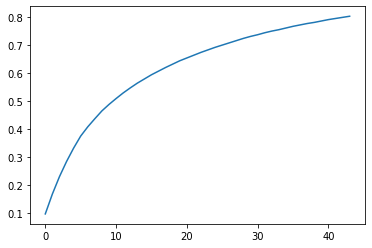

In [6]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)

no_component = explained_variance.size
plt.plot(np.arange(no_component), explained_variance, ls='-')

print("Explained Variance: " + str(round(variant_expectation, 2)) + " Number of Components: " + str(no_component))

# **2. Введите количество верно классифицированных объектов класса номер_в_списке%9 для тестовых данных**

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

In [9]:
X_test = modelPCA.transform(X_test)
X_test.shape

(10000, 44)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

print("The number of correctly classified images contained in Class " + str(number_in_the_list%9) + " is: " + str(
    CM[number_in_the_list%9][number_in_the_list%9]))

The number of correctly classified images contained in Class 1 is: 1114


# **3. Введите вероятность отнесения 5 любых изображений из тестового набора к назначенному классу**


In [12]:
import random
random.seed(42)

for i in range(5):
    id = random.randint(0, X_test.shape[0])
    result = clf.predict_proba(X_test)[id][y_pred[id]]
    print("The probability that picture No." + str(id) + " belongs to Class " + str(y_pred[id]) + " is: " + str(round(result, 4)))

The probability that picture No.1824 belongs to Class 2 is: 0.9059
The probability that picture No.409 belongs to Class 1 is: 0.8601
The probability that picture No.4506 belongs to Class 2 is: 0.6135
The probability that picture No.4012 belongs to Class 4 is: 0.6819
The probability that picture No.3657 belongs to Class 6 is: 0.8653


# **4. Определите Accuracy, Precision, Recall и F1 для обученной модели**


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average=None)
Recall = recall_score(y_test, y_pred, average=None)
F1 = f1_score(y_test, y_pred, average=None)

In [15]:
import pandas as pd
Class_name = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
df = pd.DataFrame({'Class': Class_name, 'Precision': Precision, 'Recall': Recall, 'F1': F1})
print("The Accuracy of the above model is: " + str(Accuracy))
df

The Accuracy of the above model is: 0.928


,Class,Precision,Recall,F1
0,Class 0,0.942574,0.971429,0.956784
1,Class 1,0.976337,0.981498,0.978910
2,Class 2,0.934394,0.910853,0.922473
3,Class 3,0.908113,0.919802,0.913920
4,Class 4,0.922919,0.914460,0.918670
5,Class 5,0.896514,0.922646,0.909392
6,Class 6,0.943935,0.966597,0.955132
7,Class 7,0.946162,0.923152,0.934515
8,Class 8,0.902232,0.871663,0.886684
9,Class 9,0.896414,0.891972,0.894188


# **5. Сделайте вывод про обученную модель**

Я использовал анализ основных компонентов, установил долю объясненной дисперсии выше 0.80 и обучил модель с основными компонентами 44. Модель RandomForest в наборе данных MNIST показала хорошие результаты с Accuracy = 0.928.